In [1]:
!kaggle competitions download -c nlp-getting-started

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd
train = pd.read_csv('nlp-getting-started/train.csv')
test = pd.read_csv('nlp-getting-started/test.csv')
train.head()


id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

- Îç∞Ïù¥ÌÑ∞Îäî id, keyword, location, text, target Îì± Ï¥ù 5Í∞ú Î≥ÄÏàòÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
- id - Í∞Å Ìä∏ÏúÑÌÑ∞ Îç∞Ïù¥ÌÑ∞Ïùò ÏãùÎ≥ÑÏûê
- keyword - Ìï¥Îãπ Ìä∏ÏúóÏùò ÌäπÏ†ï ÌÇ§ÏõåÎìú
- location - Ìä∏ÏúÑÌÑ∞Í∞Ä ÏûëÏÑ±Îêú Ïû•ÏÜå
- text - Ïã§Ï†ú Ìä∏ÏúóÏùò Î©îÏãúÏßÄ
- target - Ìä∏ÏúÑÌÑ∞Í∞Ä Ïã§Ï†úÎ°ú Ïû¨ÎÇúÏù¥ÎùºÎ©¥ 1, Í∞ÄÏßúÎùºÎ©¥ 0ÏúºÎ°ú ÌëúÏãú

In [3]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


- test Îç∞Ïù¥ÌÑ∞Ïóê target Î≥ÄÏàò Î™ÖÏù¥ ÏóÜÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

## ÌÉêÏÉâÏ†Å ÏûêÎ£å Î∂ÑÏÑù

<ipython-input-4-68b5ad668110>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


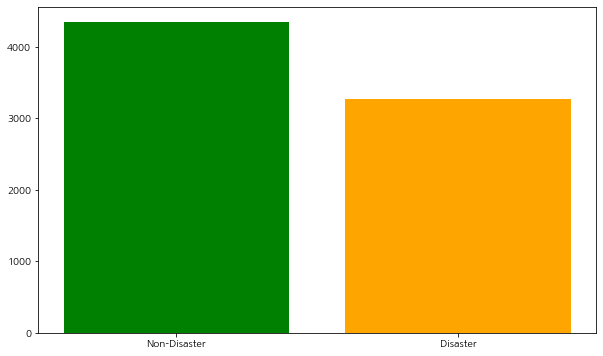

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
news_class = train['target'].value_counts()
labels = ['Non-Disaster', 'Disaster']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, news_class, color=['green', 'orange'])

fig.show()

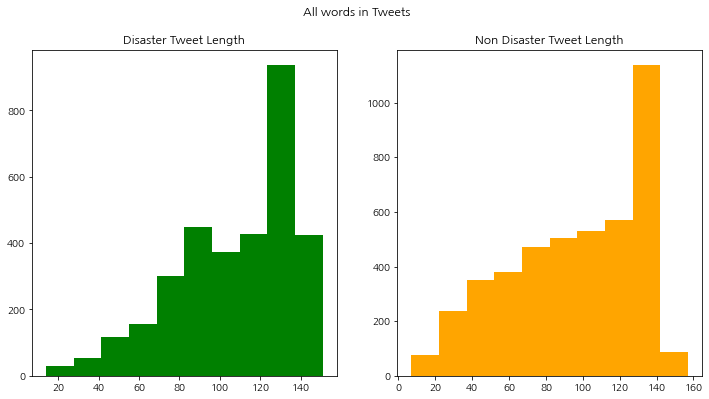

In [5]:
# Ìä∏Ïúó Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(disaster_tweet_len, color='green')
ax[0].set_title('Disaster Tweet Length')

ax[1].hist(non_disaster_tweet_len, color='orange')
ax[1].set_title('Non Disaster Tweet Length')

fig.suptitle('All words in Tweets')
plt.show()

- Í∏∏Ïù¥Í∞Ä 140 Ïù¥ÌõÑ Non DisasterÎäî Í∏âÍ≤©ÌïòÍ≤å Îñ®Ïñ¥ÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏

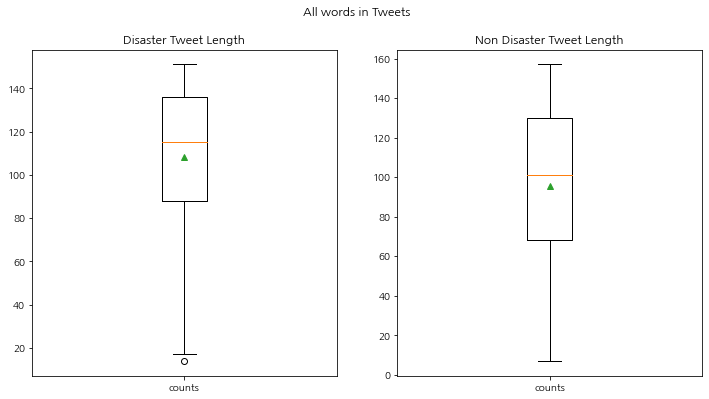

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(disaster_tweet_len, labels=['counts'], showmeans=True)
ax[0].set_title('Disaster Tweet Length')

ax[1].boxplot(non_disaster_tweet_len, labels=['counts'], showmeans=True)
ax[1].set_title('Non Disaster Tweet Length')

fig.suptitle('All words in Tweets')
plt.show()


- Îëê Îç∞Ïù¥ÌÑ∞ Î™®Îëê Ï§ëÍ∞ÑÍ∞íÎ≥¥Îã§ ÏûëÏùÄ Í∞íÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

In [7]:
## Numpy ÌôúÏö©
import numpy as np

disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

print('Max Length of Disaster Tweet: {}'.format(np.max(disaster_tweet_len)))
print('Min Length of Disaster Tweet: {}'.format(np.min(disaster_tweet_len)))
print('Mean Length of Disaster Tweet: {}'.format(np.mean(disaster_tweet_len)))
print('Median Length of Disaster Tweet: {}'.format(np.median(disaster_tweet_len)))

print('Max Length of Non Disaster Tweet: {}'.format(np.max(non_disaster_tweet_len)))
print('Min Length of Non Disaster Tweet: {}'.format(np.min(non_disaster_tweet_len)))
print('Mean Length of Non Disaster Tweet: {}'.format(np.mean(non_disaster_tweet_len)))
print('Median Length of Non Disaster Tweet: {}'.format(np.median(non_disaster_tweet_len)))

Max Length of Disaster Tweet: 151
Min Length of Disaster Tweet: 14
Mean Length of Disaster Tweet: 108.11342097217977
Median Length of Disaster Tweet: 115.0
Max Length of Non Disaster Tweet: 157
Min Length of Non Disaster Tweet: 7
Mean Length of Non Disaster Tweet: 95.70681713496084
Median Length of Non Disaster Tweet: 101.0


<ipython-input-8-cdc058eae20e>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


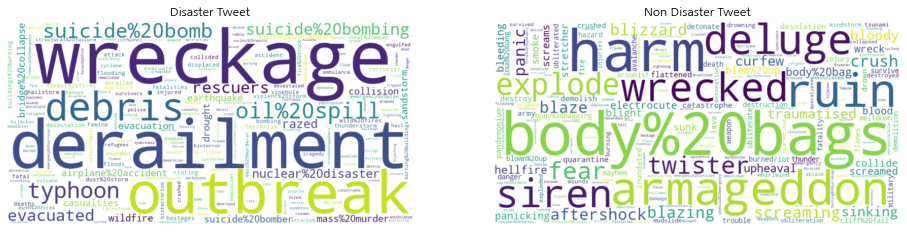

In [8]:
## wordcloud ÌôúÏö©
from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords=set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').\
    generate_from_frequencies(disaster_tweet_keywords)

non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').\
    generate_from_frequencies(non_disaster_tweet_keywords)

fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Disaster Tweet')

ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Non Disaster Tweet')

fig.show()

- Disaster Ìä∏ÏúóÏùÄ Derailment(ÌÉàÏÑ†), Outbreak(Ïñ¥Îñ§ ÏÇ¨Í±¥Ïùò Î∞úÏÉù), Wreckage(ÎÇúÌåå), Typhoon(ÌÉúÌíç) Îì±
     Î™ÖÏÇ¨ ÌïòÎÇòÎ°úÎèÑ Ï∂©Î∂ÑÌïòÍ≤å ÏÑ§Î™ÖÎêòÎäî ÏßÑÏßú Ïû¨ÎÇú Îâ¥Ïä§Ïù∏ Î∞òÎ©¥
- Non Disaster Ìä∏ÏúóÏùÄ Î™ÖÏÇ¨Î≥¥Îã® ÌòïÏö©ÏÇ¨ÎÇò ÎèôÏÇ¨Í∞Ä Ï£ºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

## ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ

In [9]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
import pandas as pd
def check_na(data):
    isnull_na = (data.isnull().sum()/len(data))*100
    data_na = isnull_na.drop(isnull_na[isnull_na==0].index).sort_values(ascending=False)
    missing_data=pd.DataFrame({'Missing Ratio': data_na,
                                'Data Type': data.dtypes[data_na.index]})
    print('Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüºÍ≥º Í±¥Ïàò:\n', missing_data)

check_na(train)
check_na(test)

Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüºÍ≥º Í±¥Ïàò:
           Missing Ratio Data Type
location      33.272035    object
keyword        0.801261    object
Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüºÍ≥º Í±¥Ïàò:
           Missing Ratio Data Type
location      33.864542    object
keyword        0.796813    object


In [10]:
# test_idÎßå Îî∞Î°ú Ï∂îÏ∂úÌï¥ Ï†ÄÏû•
test_id = test['id']
for datas in [train, test]:
    datas = datas.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
    
train.shape, test.shape

((7613, 2), (3263, 1))

### Text Cleansing
- HTML ÌÉúÍ∑∏ Ï†úÍ±∞
- ÌäπÏàòÎ¨∏Ïûê Í≥µÎ∞±ÏúºÎ°ú Î∞îÍæ∏Í∏∞
- ÎåÄÎ¨∏Ïûê ÏÜåÎ¨∏ÏûêÎ°ú Î∞îÍæº ÌõÑ, Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì§Í∏∞
- Î∂àÏö©Ïñ¥ Ï†úÍ±∞ÌïòÍ∏∞


In [11]:
# url Ï†úÍ±∞
import re


def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)


sample_text = "ÏÉàÎ°úÏö¥ Ï∫êÍ∏Ä ÎåÄÌöåÍ∞Ä Ïó¥Î†∏ÏäµÎãàÎã§. Ï£ºÏÜå: https://www.kaggle.com/c/nlp-getting-started"
remove_url(sample_text)


'ÏÉàÎ°úÏö¥ Ï∫êÍ∏Ä ÎåÄÌöåÍ∞Ä Ïó¥Î†∏ÏäµÎãàÎã§. Ï£ºÏÜå: '

In [12]:
# html Ï†úÍ±∞
def remove_html(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'', text)


sample_text = """<div>
<h1> Real News or Fake News </h1>
<p> Kaggle Machine Learning </p>
</div>"""

print(remove_html(sample_text))



 Real News or Fake News 
 Kaggle Machine Learning 



In [13]:
!pip install emoji --upgrade

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169294 sha256=e85a9d4bc244d43f98967131b9c3ffa0a4f0eaca6ec95bc24d665a2649e00738
  Stored in directory: c:\users\wkddn\appdata\local\pip\cache\wheels\04\29\50\1e7189f03d2cf139e469863d54a1d3eabeb10c92c84e51f8a1
Successfully built emoji


In [14]:
import emoji
print(emoji.emojize('Phd is very easy!!! :thumbs_up:'))


Phd is very easy!!! üëç


In [15]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)


remove_emoji("Hello, üëç")


'Hello, '

In [16]:
def remove_punct(text):
  return re.sub("[^a-zA-Z]", " ", text)


sample_text = "Hello!, Can I have one question?.., Is it #Outbreak?"
remove_punct(sample_text)


'Hello   Can I have one question     Is it  Outbreak '

In [17]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

print("Total Length of stopwords:", len(stopwords.words('english')))
print(stopwords.words('english')[:10])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wkddn\AppData\Roaming\nltk_data...


Total Length of stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data]   Unzipping corpora\stopwords.zip.


In [18]:
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def data_cleansing(text, remove_stopwords = False):
  # remove url 
  url = re.compile(r'https?://\S+|www\.\S+')
  cleaned_text = url.sub(r'', text)

  # remove html
  html = re.compile(r'<.*?>')
  cleaned_text = html.sub(r'', cleaned_text)

  # remove emoji
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  cleaned_text = emoji_pattern.sub(r'', cleaned_text)

  # Special Letters to empty space
  cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)

  # Lowercase
  cleaned_text = cleaned_text.lower().split()

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    cleaned_text = [word for word in cleaned_text if not word in stops]
    clean_review = ' '.join(cleaned_text)
  else:
    clean_review = ' '.join(cleaned_text)

  return clean_review

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wkddn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
clean_train_reviews = []
for datas in [train, test]:
    datas['cleaned_text'] = datas['text'].apply(
        lambda x: data_cleansing(x, remove_stopwords=True))

train.head(5)


text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   
1             Forest fire near La Ronge Sask. Canada       1   
2  All residents asked to 'shelter in place' are ...       1   
3  13,000 people receive #wildfires evacuation or...       1   
4  Just got sent this photo from Ruby #Alaska as ...       1   

                                        cleaned_text  
0       deeds reason earthquake may allah forgive us  
1              forest fire near la ronge sask canada  
2  residents asked shelter place notified officer...  
3  people receive wildfires evacuation orders cal...  
4  got sent photo ruby alaska smoke wildfires pou...

In [20]:
test.head(5)

text  \
0                 Just happened a terrible car crash   
1  Heard about #earthquake is different cities, s...   
2  there is a forest fire at spot pond, geese are...   
3           Apocalypse lighting. #Spokane #wildfires   
4      Typhoon Soudelor kills 28 in China and Taiwan   

                                        cleaned_text  
0                        happened terrible car crash  
1  heard earthquake different cities stay safe ev...  
2  forest fire spot pond geese fleeing across str...  
3              apocalypse lighting spokane wildfires  
4                typhoon soudelor kills china taiwan